In [1]:
import matplotlib
import matplotlib.pyplot as plt
import math
import numpy as np
import pylab as pl
from scipy.signal import butter,freqz, filtfilt, firwin, iirnotch, lfilter, find_peaks

matplotlib.style.use('ggplot')
%matplotlib notebook

In [2]:
def pull_data(dir_name, file_name):
    f = open(dir_name + '/' + file_name + '.csv')
    xs = []
    ys = []
    zs = []
    rs = []
    timestamps = []
    f.readline() # ignore headers
    for line in f:
        
        value = line.split(',')
        if(value[0] == "time"):
            continue
        if len(value) > 3:
            timestamps.append(float(value[-5])) 
            x = float(value[-1])
            y = float(value[-2])
            z = float(value[-3])
            r = math.sqrt(x ** 2 + y ** 2 + z ** 2)
            xs.append(x)
            ys.append(y)
            zs.append(z)
            rs.append(r)
    return np.array(xs), np.array(ys), np.array(zs), np.array(rs), np.array(timestamps)

In [3]:
#situps
x_data, y_data, z_data, signal, timestamps = pull_data('data','situps')
x_data = x_data[100:3000] 
y_data = y_data[100:3000]
z_data = z_data[100:3000]
mag = signal[100:3000]
timestamps = timestamps[100:3000]

<IPython.core.display.Javascript object>


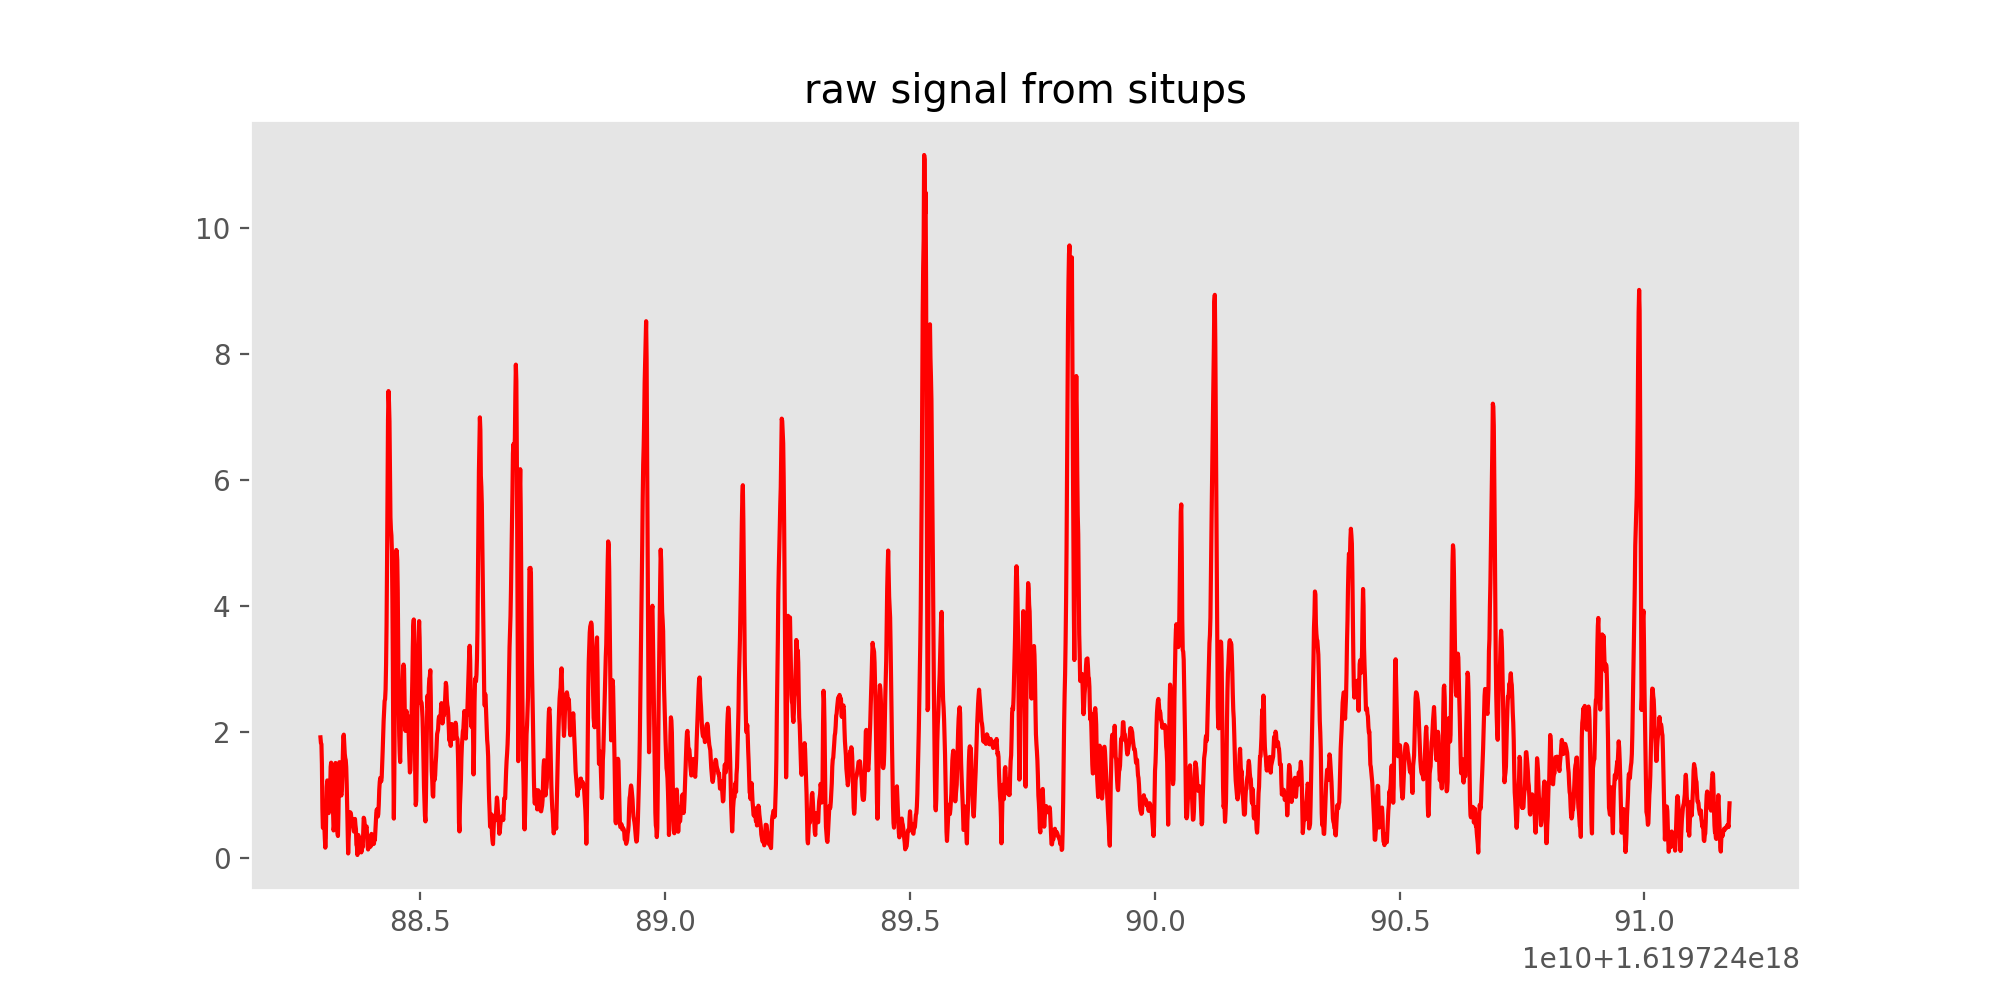

In [4]:
plt.figure(figsize=(10,5))
plt.plot(timestamps, mag, 'r-', label='raw')
plt.title("raw signal from situps")
pl.grid()
pl.show()

In [5]:
order = 5
fs = 50.0  # sample rate, Hz
cutoff = 2.4  # desired cutoff frequency of the filter, Hz. MODIFY AS APPROPROATE

# Create the filter.
nyq = 0.5 * fs
normal_cutoff = cutoff / nyq
b, a = butter(order, normal_cutoff, btype='low', analog=False)

# Apply the butterworth filter on the signal
finalSig = filtfilt(b, a, mag)

<IPython.core.display.Javascript object>


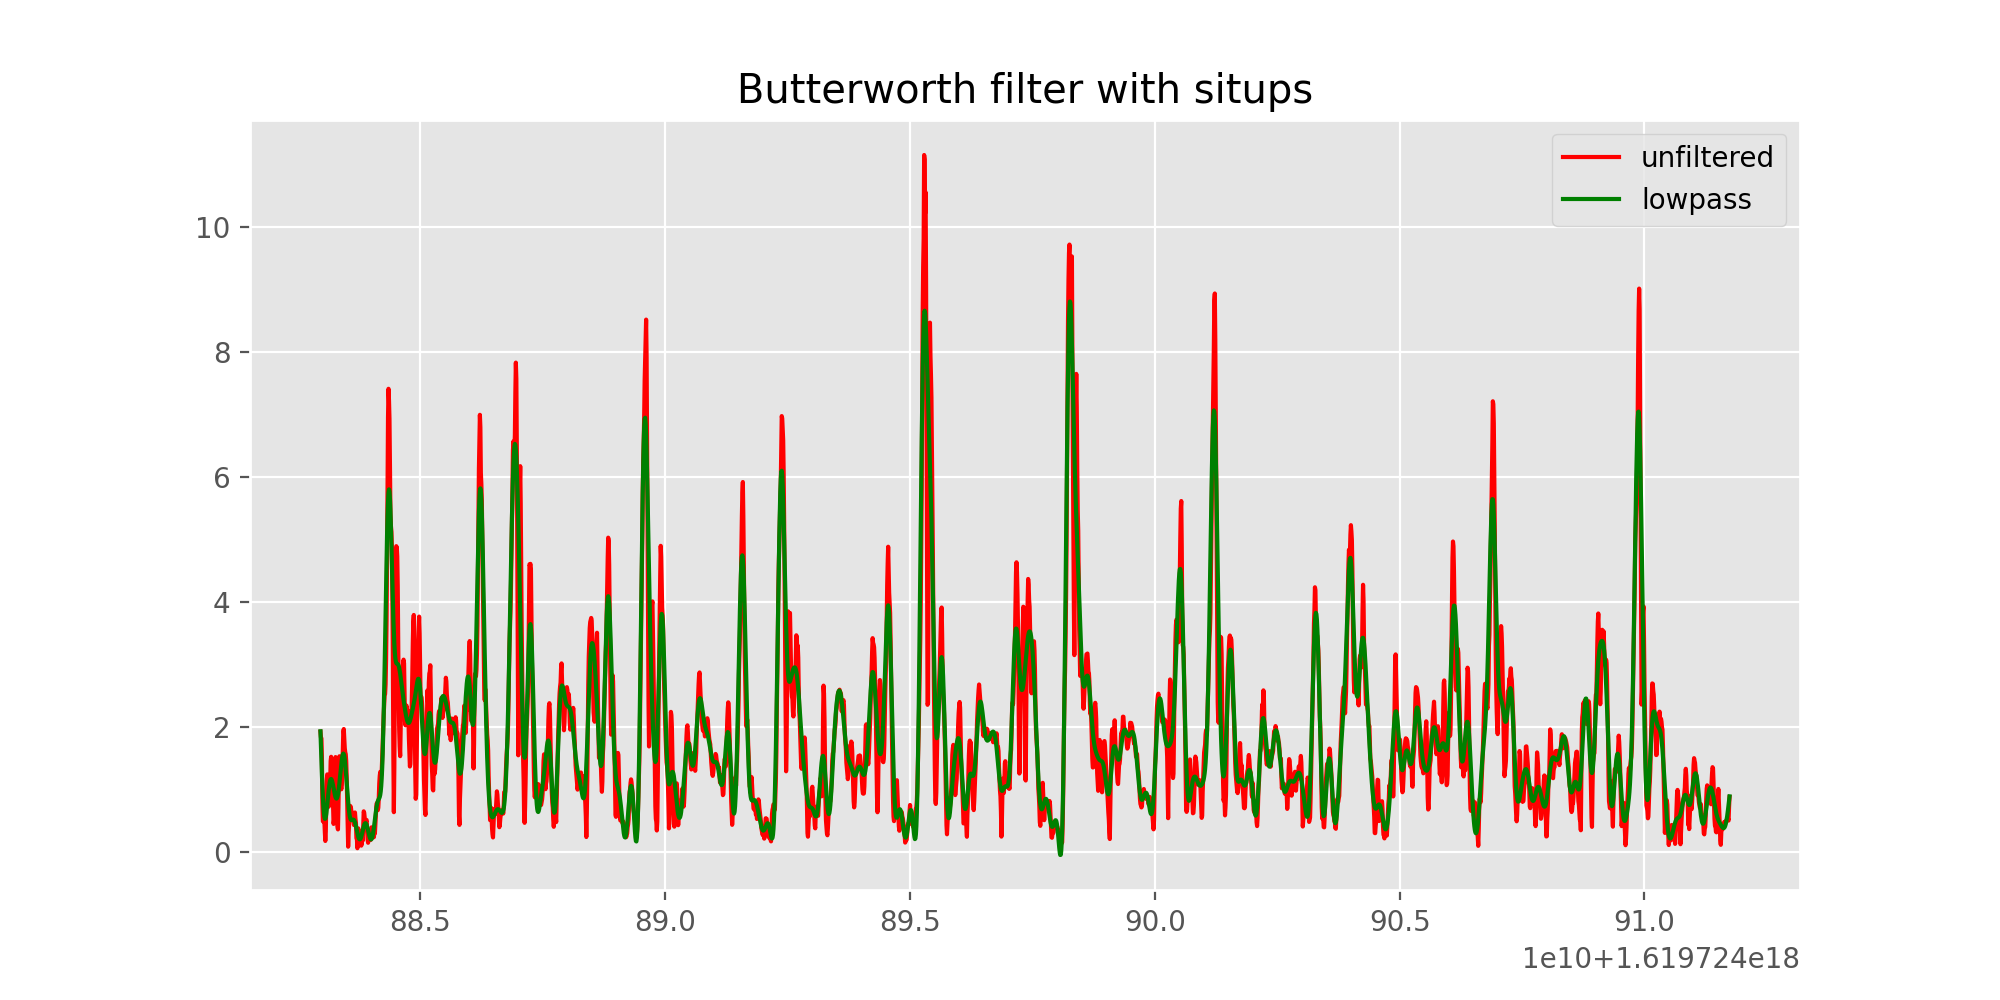

Text(0.5, 1.0, 'Butterworth filter with situps')

In [6]:
plt.figure(figsize=(10,5))
pl.plot(timestamps, signal[100:3000], 'r-',label='unfiltered')
pl.plot(timestamps, finalSig, 'g-', label='lowpass')
plt.legend(loc='best')
plt.title("Butterworth filter with situps")

<IPython.core.display.Javascript object>


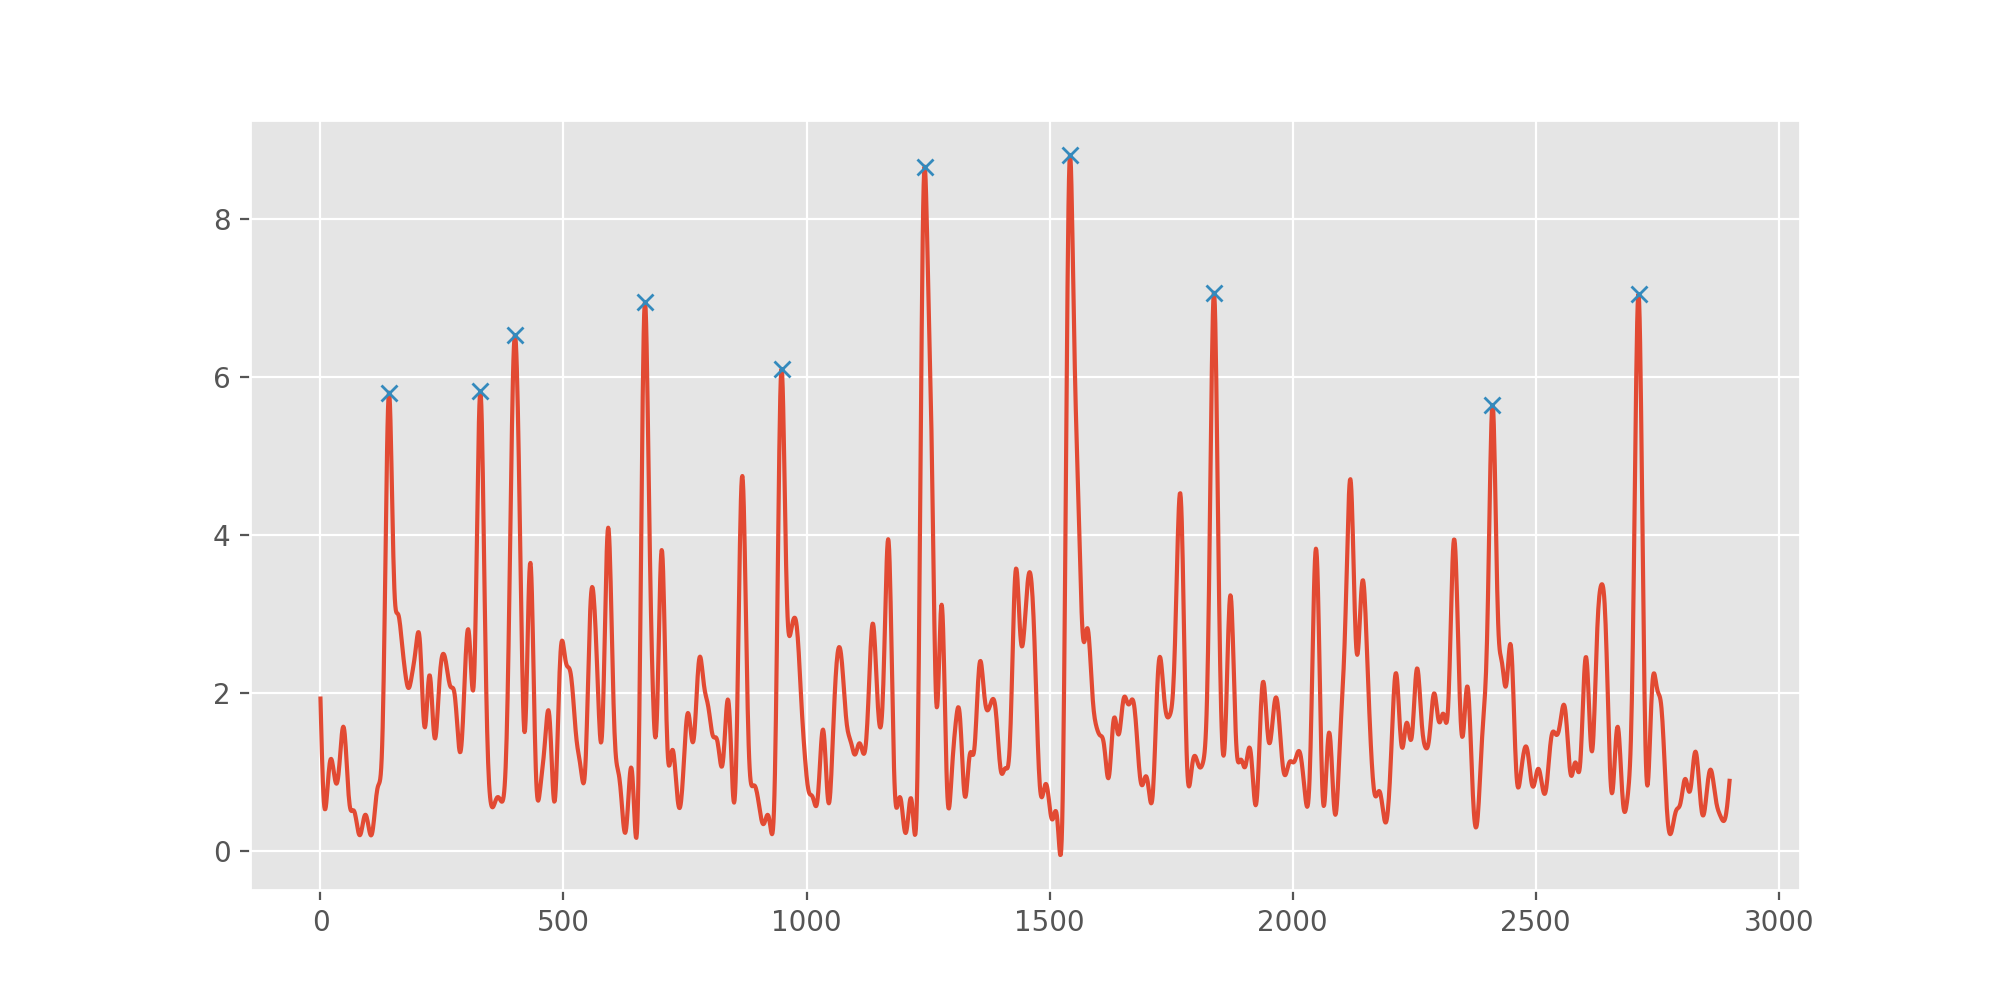

10


<IPython.core.display.Javascript object>


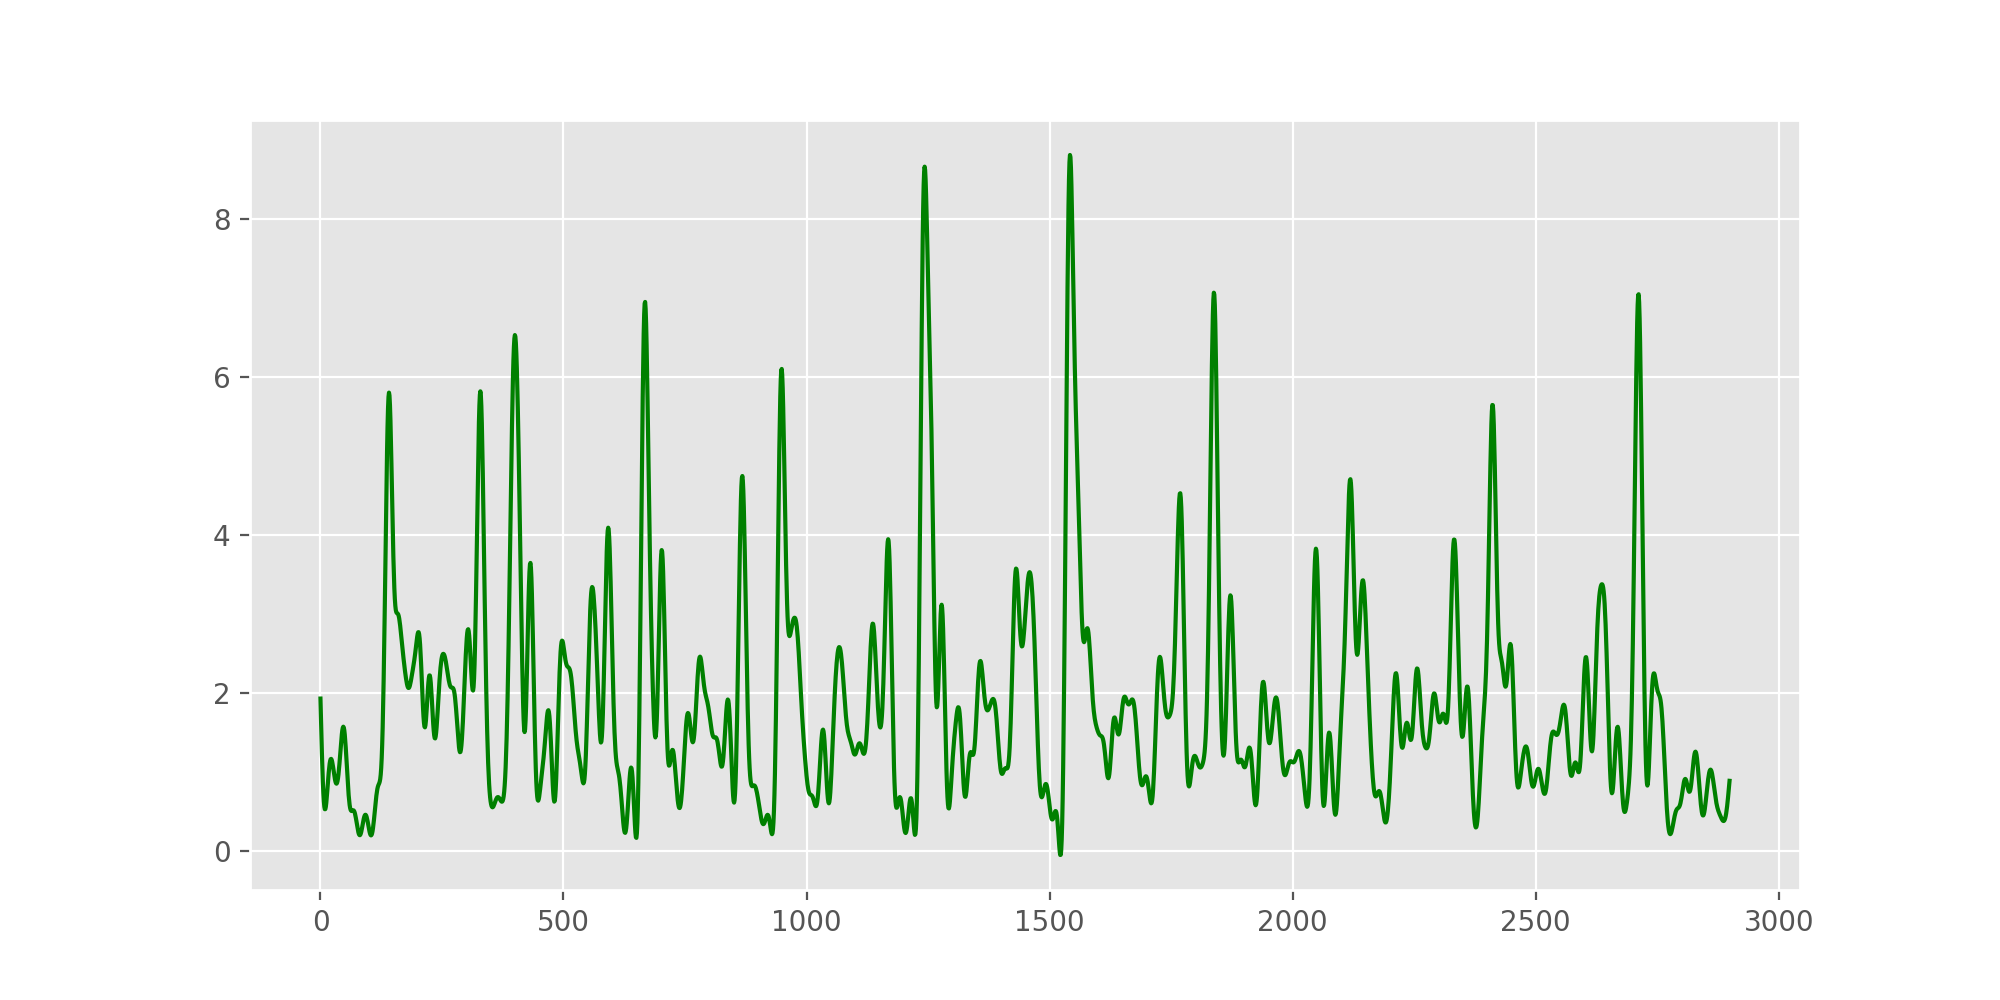

In [9]:
#apply find peaks here for situps to the filtered signal and print the result
from scipy.signal import find_peaks

peaks, _ = find_peaks(finalSig, height=5.5)
plt.figure(figsize=(10,5))
plt.plot(finalSig)
plt.plot(peaks, finalSig[peaks], "x")
plt.show()
print(len(peaks))

plt.figure(figsize=(10,5))
plt.plot(finalSig, 'g-', label='lowpass filter')

In [10]:
#chinups
x_data, y_data, z_data, signal, timestamps = pull_data('data','chinups')
x_data = x_data[500:2100] 
y_data = y_data[500:2100]
z_data = z_data[500:2100]
mag = signal[500:2100]
timestamps = timestamps[500:2100]

<IPython.core.display.Javascript object>


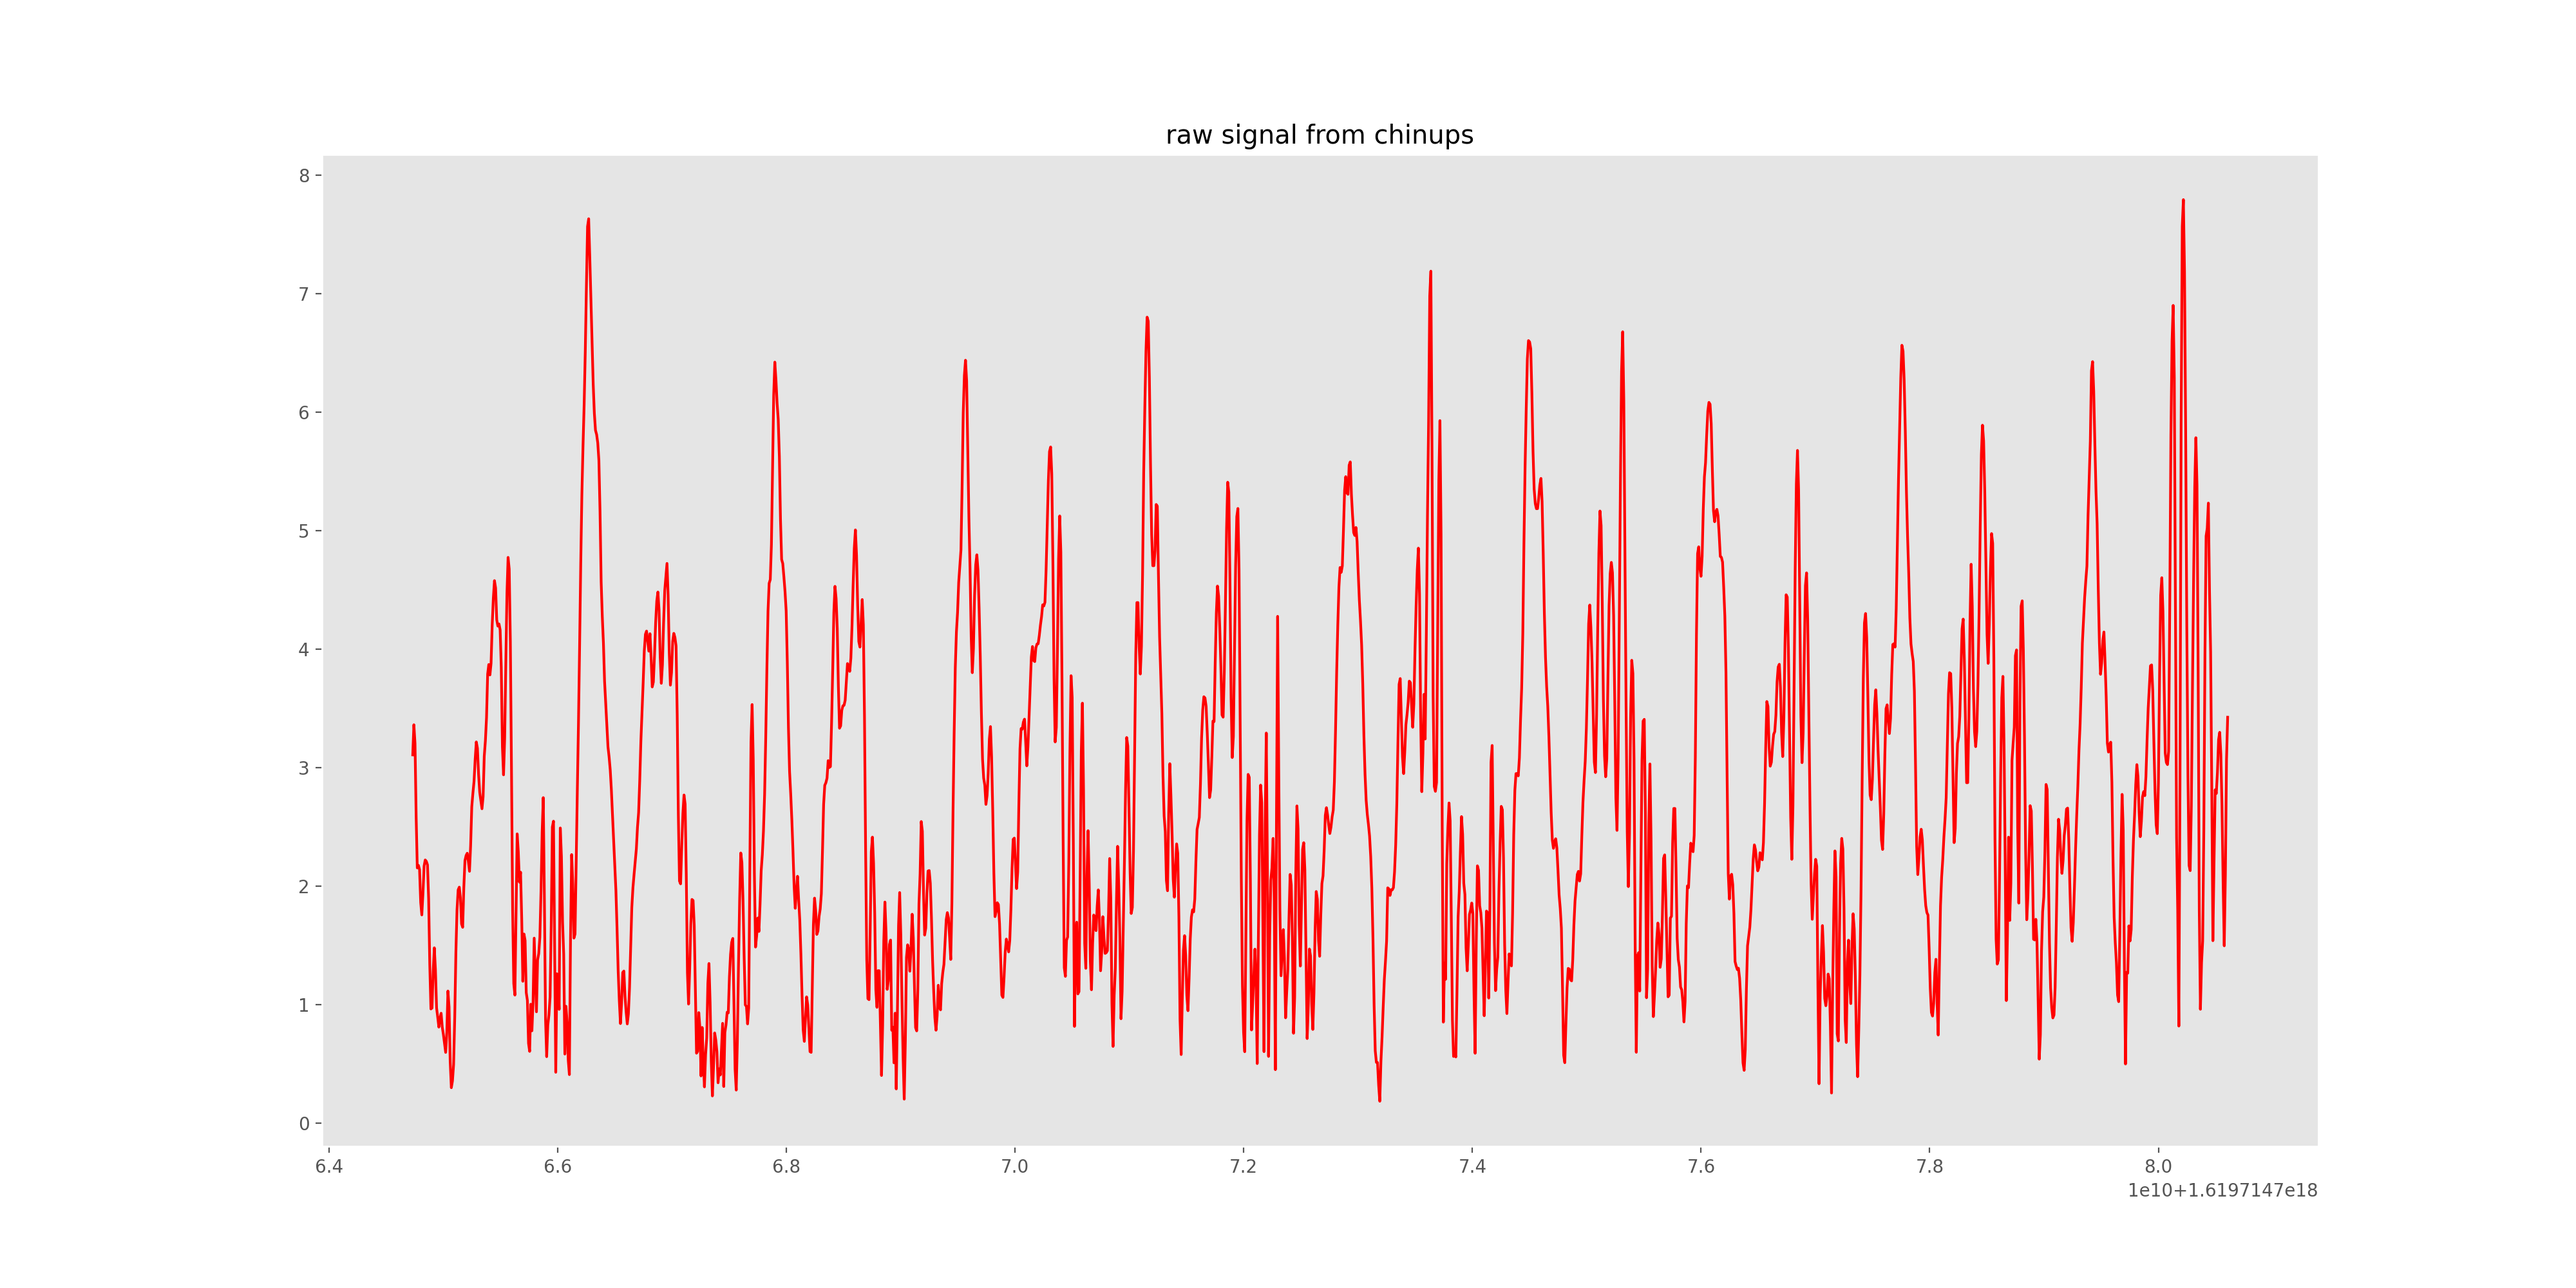

In [11]:
plt.figure(figsize=(10,5))
plt.plot(timestamps, mag, 'r-', label='raw')
plt.title("raw signal from chinups")
pl.grid()
pl.show()

In [12]:
order = 5
fs = 50.0  # sample rate, Hz
cutoff = 2.4  # desired cutoff frequency of the filter, Hz. MODIFY AS APPROPROATE

# Create the filter.
nyq = 0.5 * fs
normal_cutoff = cutoff / nyq
b, a = butter(order, normal_cutoff, btype='low', analog=False)

# Apply the butterworth filter on the signal
finalSig = filtfilt(b, a, mag)

<IPython.core.display.Javascript object>


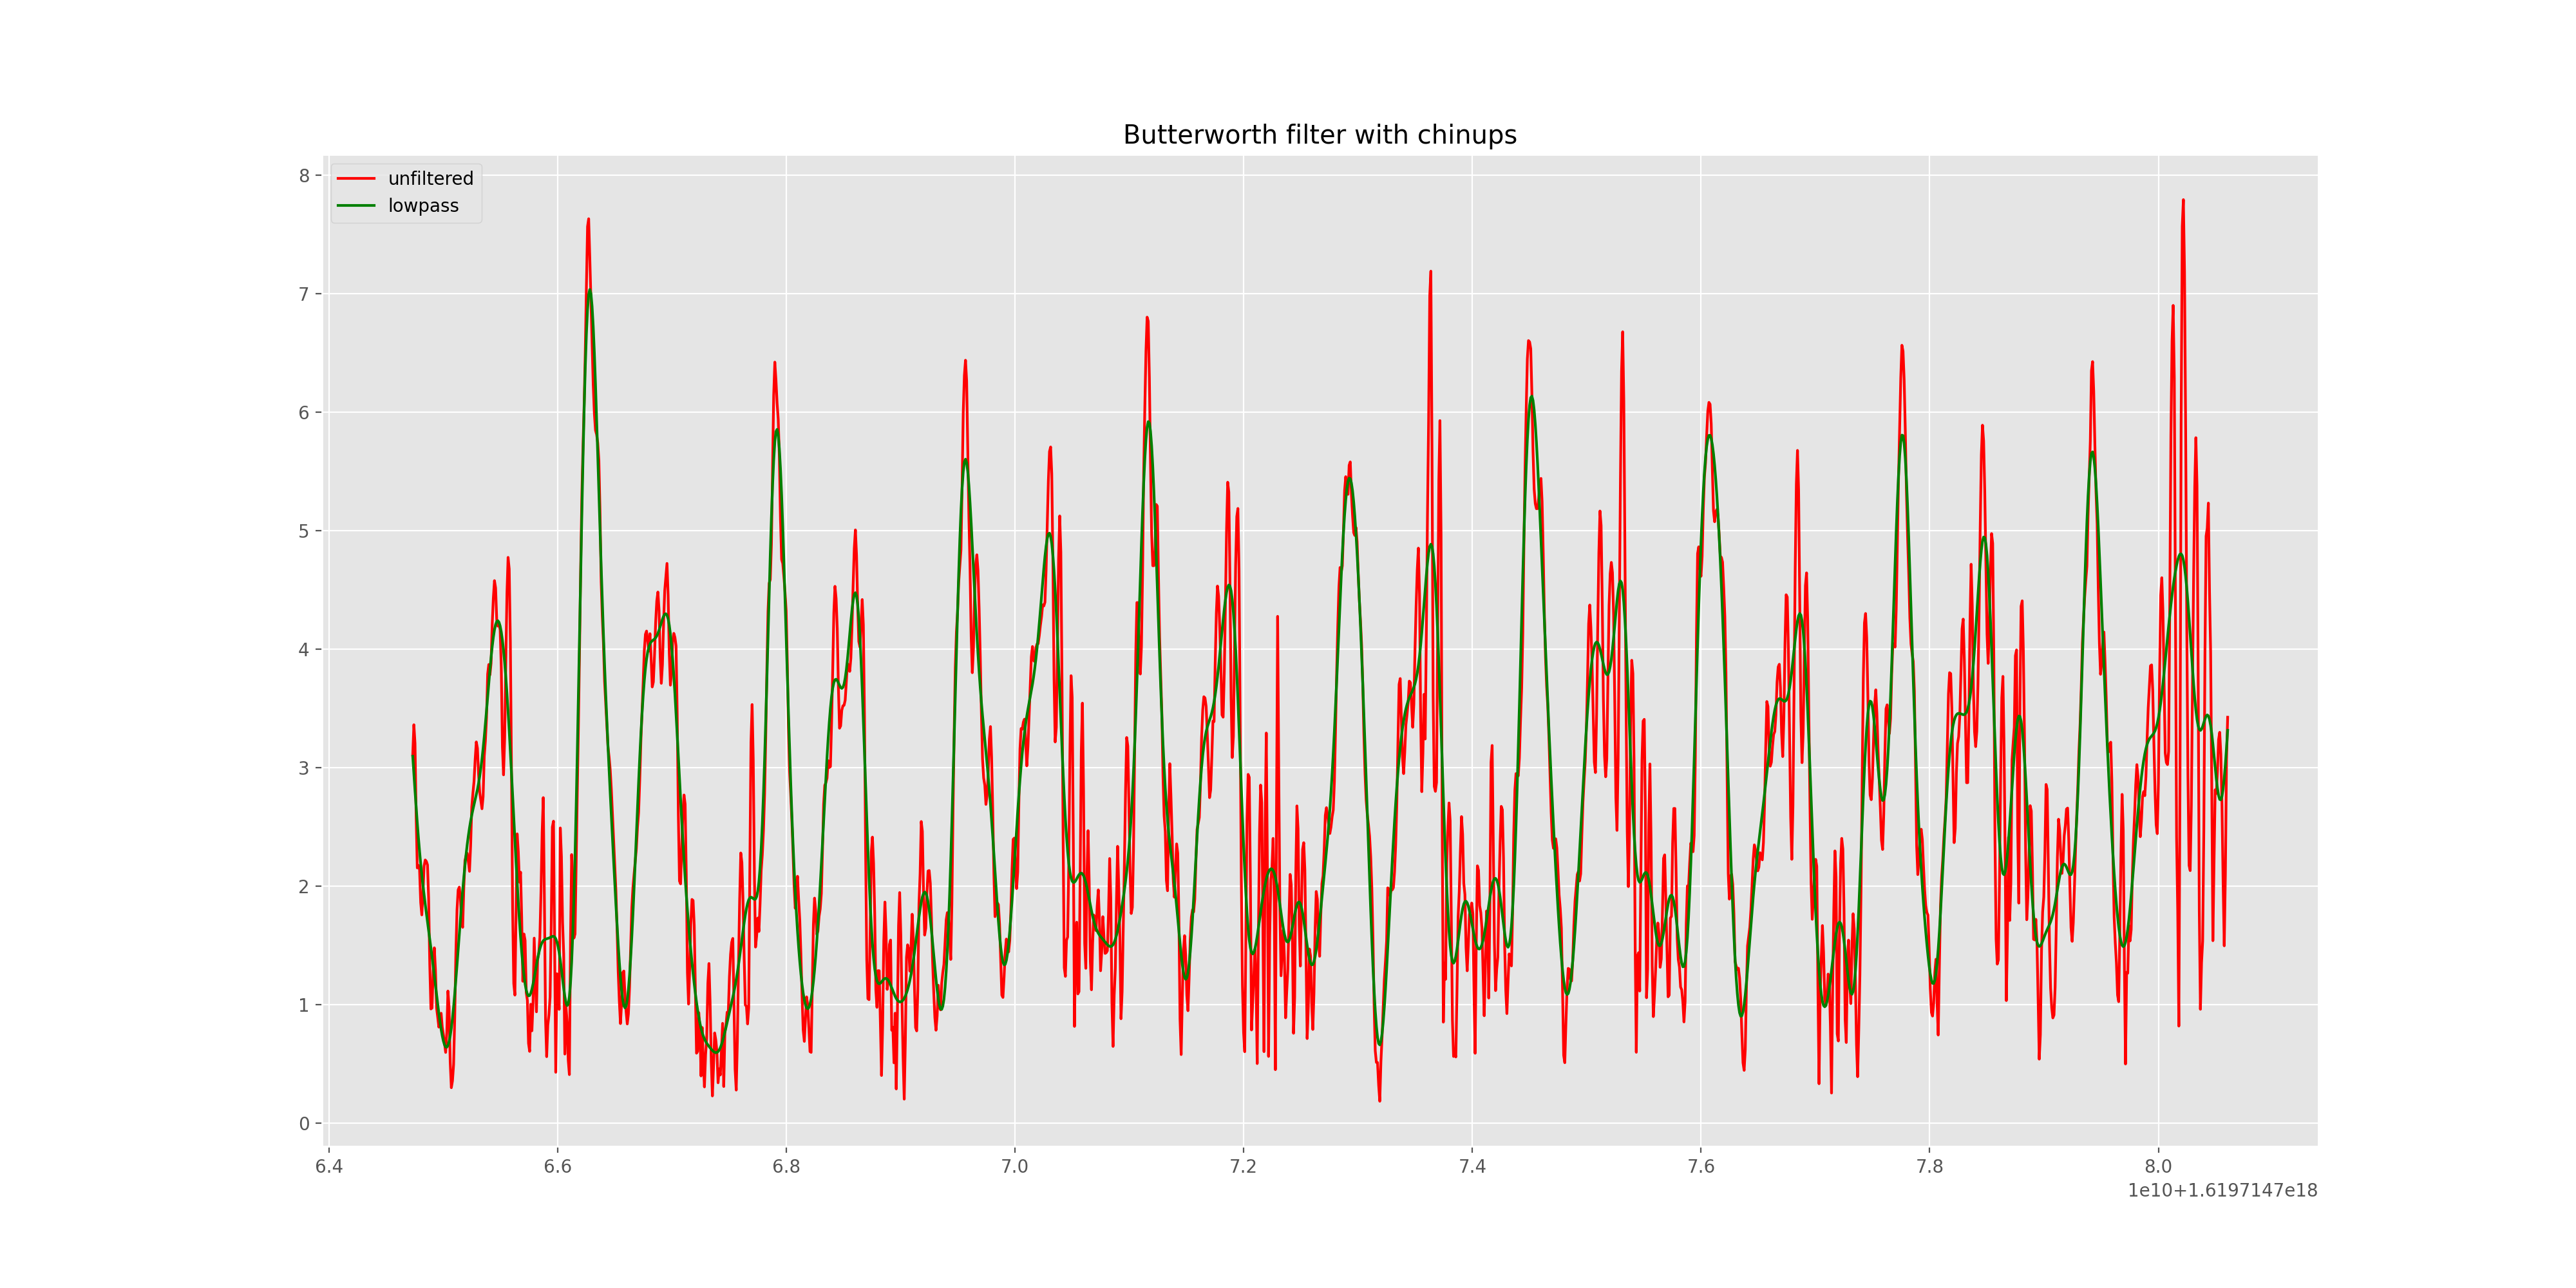

Text(0.5, 1.0, 'Butterworth filter with chinups')

In [13]:
plt.figure(figsize=(10,5))
pl.plot(timestamps, signal[500:2100], 'r-',label='unfiltered')
pl.plot(timestamps, finalSig, 'g-', label='lowpass')
plt.legend(loc='best')
plt.title("Butterworth filter with chinups")

<IPython.core.display.Javascript object>


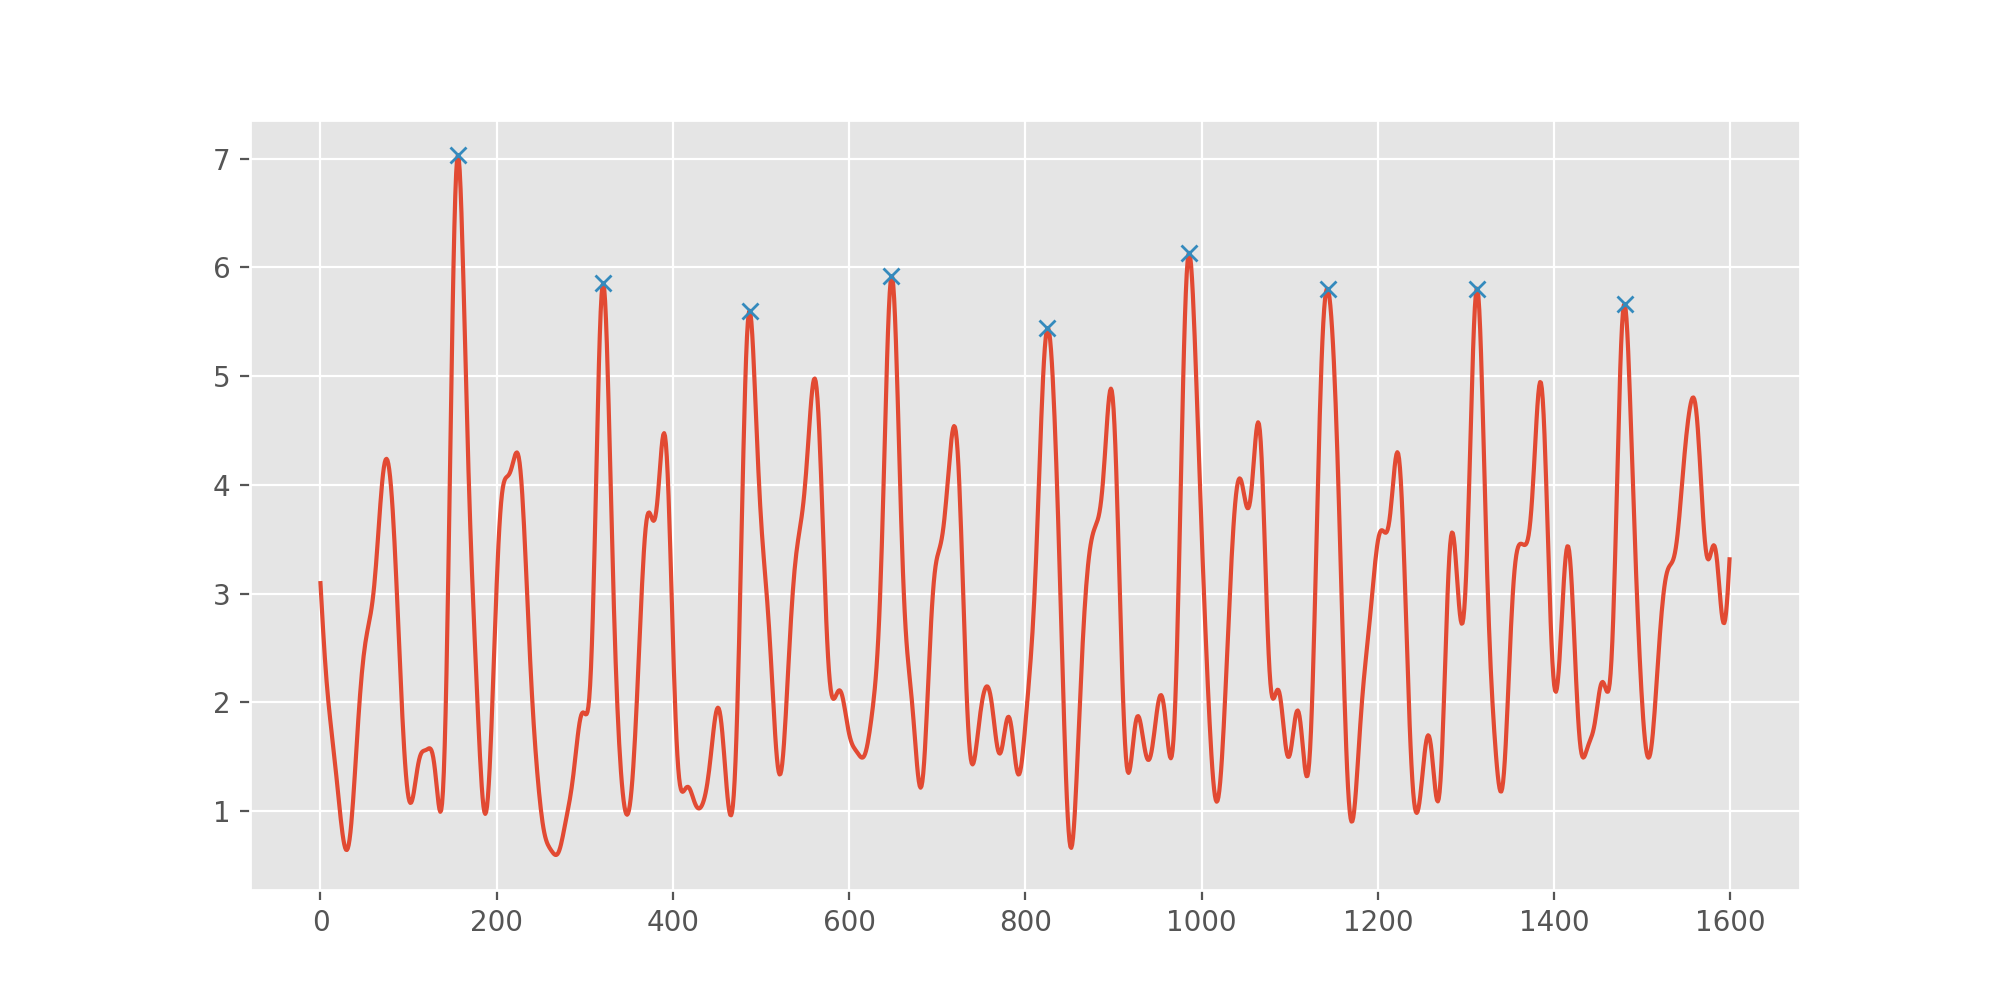

9


<IPython.core.display.Javascript object>


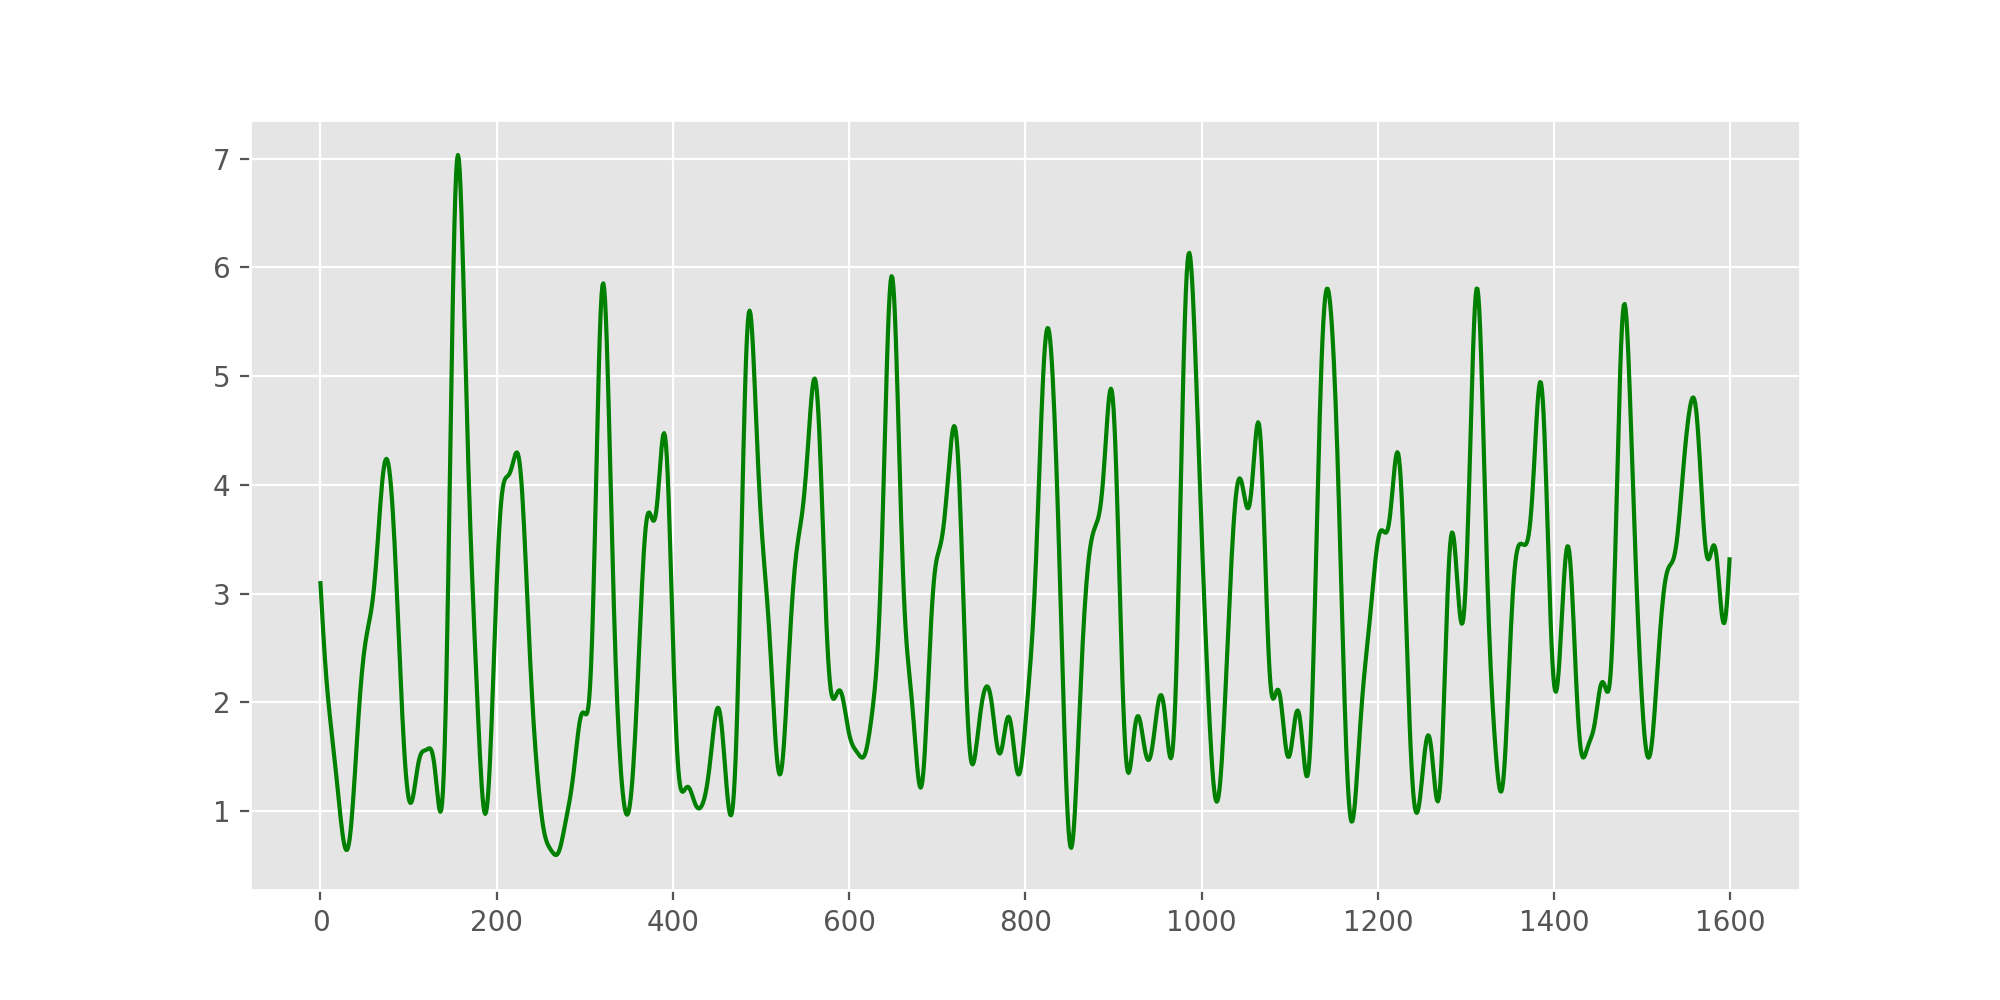

In [15]:
#apply find peaks here for chinups to the filtered signal
from scipy.signal import find_peaks

peaks, _ = find_peaks(finalSig, height=5.2)
plt.figure(figsize=(10,5))
plt.plot(finalSig)
plt.plot(peaks, finalSig[peaks], "x")
plt.show()
print(len(peaks))

plt.figure(figsize=(10,5))
plt.plot(finalSig, 'g-', label='lowpass filter')

In [16]:
#dips
x_data, y_data, z_data, signal, timestamps = pull_data('data','dips')
x_data = x_data[550:2800] 
y_data = y_data[550:2800]
z_data = z_data[550:2800]
mag = signal[550:2800]
timestamps = timestamps[550:2800]

<IPython.core.display.Javascript object>


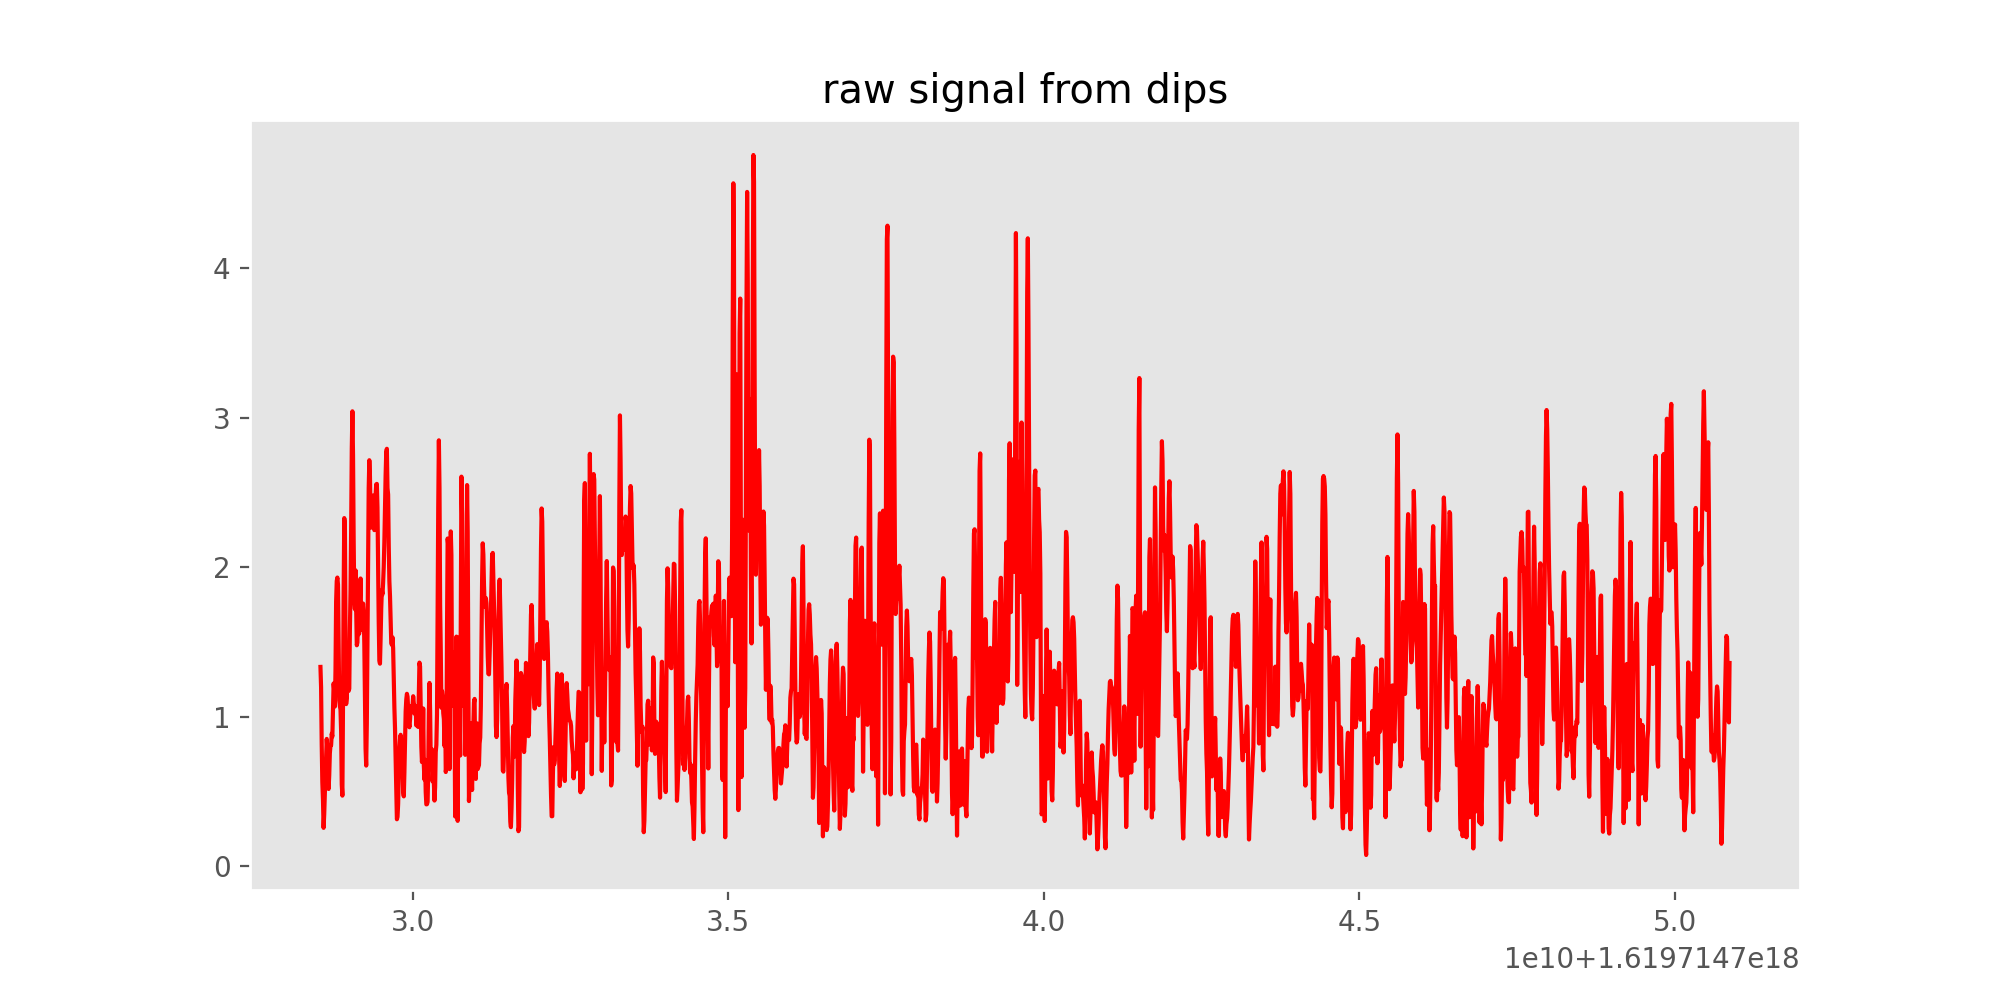

In [17]:
plt.figure(figsize=(10,5))
plt.plot(timestamps, mag, 'r-', label='raw')
plt.title("raw signal from dips")
pl.grid()
pl.show()

In [37]:
order = 5
fs = 50.0  # sample rate, Hz
cutoff = 0.9  # desired cutoff frequency of the filter, Hz. MODIFY AS APPROPROATE

# Create the filter.
nyq = 0.5 * fs
normal_cutoff = cutoff / nyq
b, a = butter(order, normal_cutoff, btype='low', analog=False)

# Apply the butterworth filter on the signal
finalSig = filtfilt(b, a, mag)

<IPython.core.display.Javascript object>


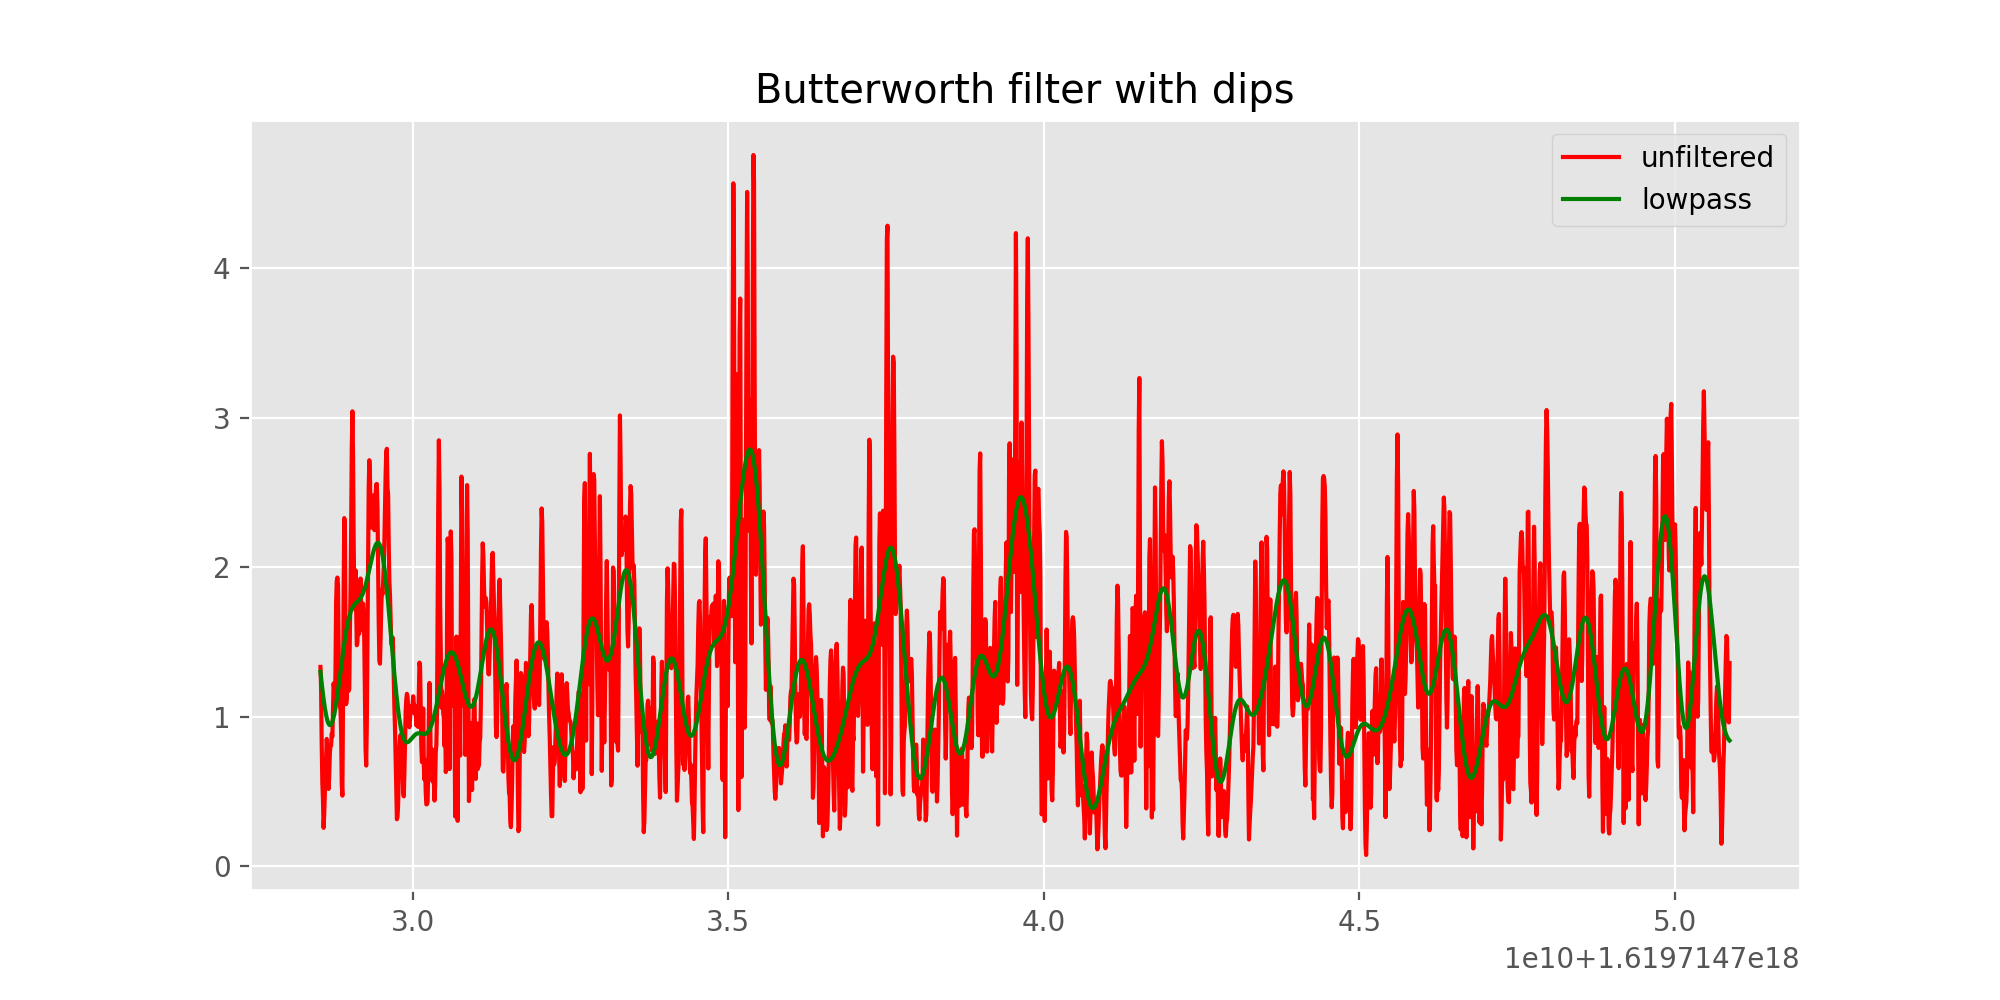

Text(0.5, 1.0, 'Butterworth filter with dips')

In [38]:
plt.figure(figsize=(10,5))
pl.plot(timestamps, signal[550:2800], 'r-',label='unfiltered')
pl.plot(timestamps, finalSig, 'g-', label='lowpass')
plt.legend(loc='best')
plt.title("Butterworth filter with dips")

<IPython.core.display.Javascript object>


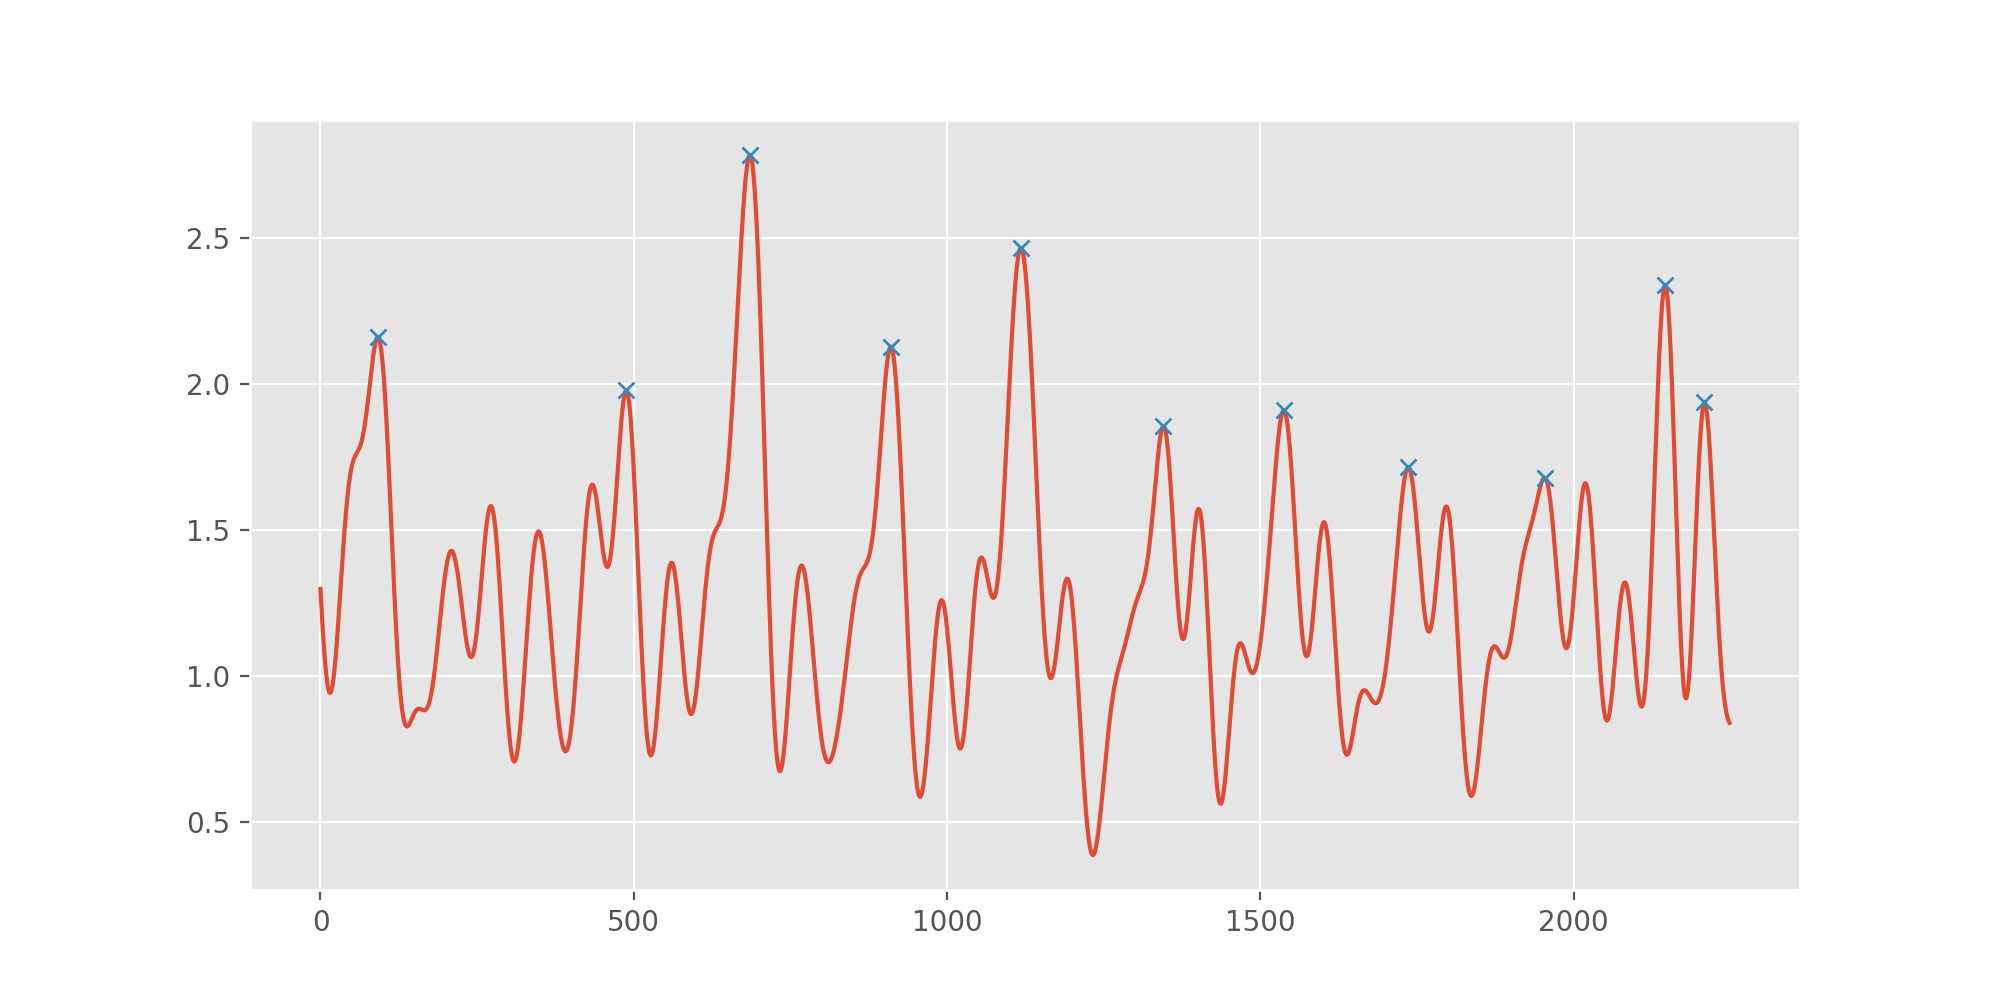

11


<IPython.core.display.Javascript object>


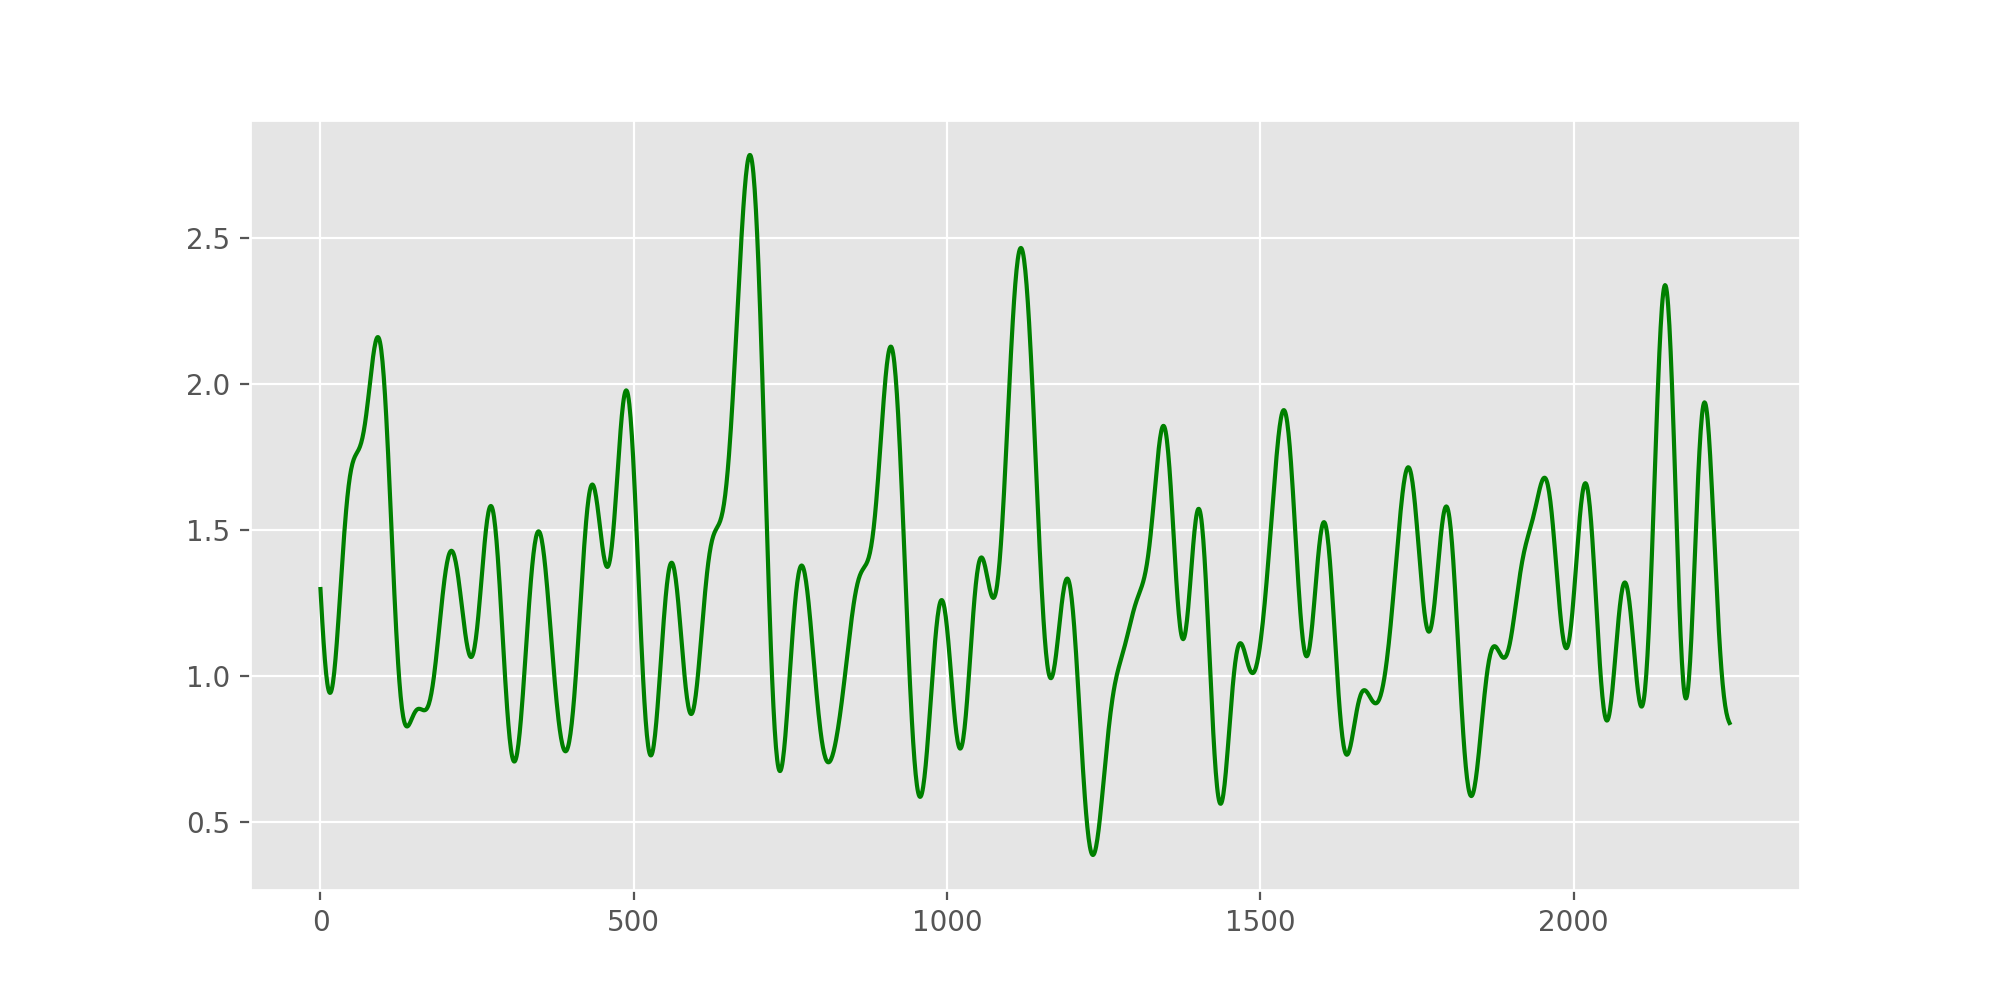

In [42]:
#apply find peaks here for dips to the filtered signal
from scipy.signal import find_peaks

peaks, _ = find_peaks(finalSig, height=1.67)
plt.figure(figsize=(10,5))
plt.plot(finalSig)
plt.plot(peaks, finalSig[peaks], "x")
plt.show()
print(len(peaks))

plt.figure(figsize=(10,5))
plt.plot(finalSig, 'g-', label='lowpass filter')